In [5]:
import os
import cv2
from utils.probeImage import probeImage
from PIL import Image,  ImageDraw
import numpy as np
import pickle
import glob

In [6]:
'''
Notes:
   img_paths: a list of 65 elements, one of which is a path for a testing image
   masks: a list of list. In a sublist, an element is an h*w array.
   allbboxes: a list of list. In a sublist, an element is an array of [x1,y1,x2,y2]. [x1,y1,x2,y2] 
             describes the loation of the corresponding mask in the sublist of the list, masks.
 
'''

img_paths = glob.glob(os.path.join("../test_imgs_mask_bbox","test","**png"))
img_paths.sort()
masks = pickle.load( open( "../test_imgs_mask_bbox/masks.p", "rb" ) )
allbboxes = pickle.load( open( "../test_imgs_mask_bbox/bboxes.p", "rb" ) )

In [7]:
sum([len(bboxes) for bboxes in allbboxes])

2650

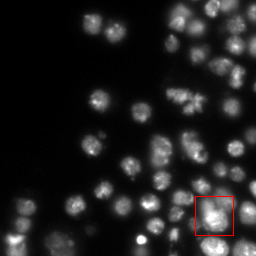

In [64]:
# the ith image; the image name is "697a05c6fe4a07c601d46da80885645ad574ea19b47ee795ccff216c9f1f1808.png"
i = 35
img_path = img_paths[i]
img = Image.open(img_path).convert("RGB")
img_arr = np.asarray(img, order='F')


# the jth nucleus in the image
j = 46 # j =38 These two mask overlapps
bbox = allbboxes[i][j]
x1, y1, x2, y2 = bbox
mask = masks[i][j]

# forget the following line
count = sum([len(bboxes) for k,bboxes in enumerate(allbboxes) if k<i] ) + j

draw = ImageDraw.Draw(img)
draw.rectangle(((bbox[0],bbox[1]),(bbox[2],bbox[3])), fill=None, outline=(255, 0, 0))
img

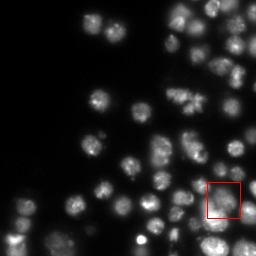

In [58]:
draw = ImageDraw.Draw(img)
draw.rectangle(((bbox[0],bbox[1]),(bbox[2],bbox[3])), fill=None, outline=(255, 0, 0))
img

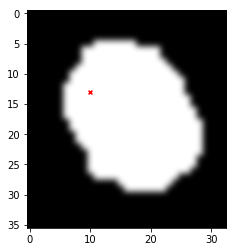

In [59]:
probeImage(mask)

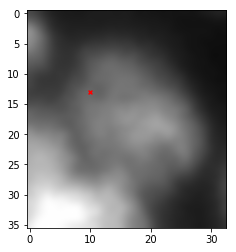

In [60]:
probeImage(img_arr[y1:y2,x1:x2])